In [1]:
# --- 1. Imports ---
import pandas as pd
import seaborn as sns
from IPython.display import display
import ipywidgets as widgets

import sys, os
sys.path.append(os.path.abspath(".."))

# Explorer modules
from explorer.data_loader import load_csv
from explorer.stats import show_summary
from explorer.visualizations import plot_histograms, plot_correlation_heatmap, boxplot, violinplot, pairplot
from explorer.filters import filter_dataframe
from explorer.eda import automated_eda
from explorer.ml_prep import ml_feature_summary
from explorer.interactive import interactive_eda

In [2]:
# --- 2. Load datasets ---
print("Loading Titanic dataset...")
titanic_df = sns.load_dataset("titanic")
print("First 5 rows of Titanic dataset:")
display(titanic_df.head())

Loading Titanic dataset...
First 5 rows of Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print("\nLoading Iris dataset...")
iris_df = sns.load_dataset("iris")
print("First 5 rows of Iris dataset:")
display(iris_df.head())


Loading Iris dataset...
First 5 rows of Iris dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



=== Titanic Automated EDA ===
=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

=== Missing Values ===


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



=== Outliers Detection (IQR) ===
survived: 0 outliers
pclass: 0 outliers
age: 11 outliers
sibsp: 46 outliers
parch: 213 outliers
fare: 116 outliers

=== Correlation Matrix ===


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000



=== Histograms ===


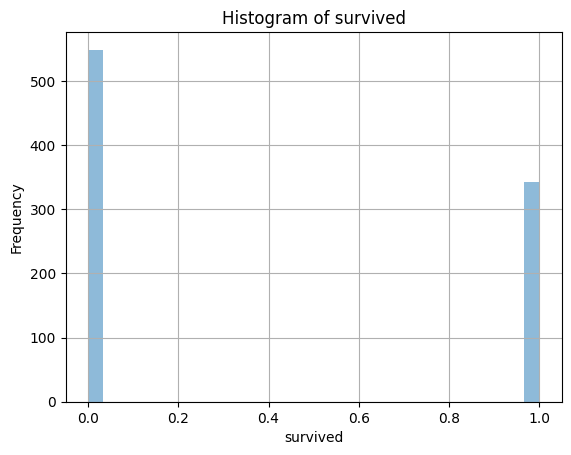

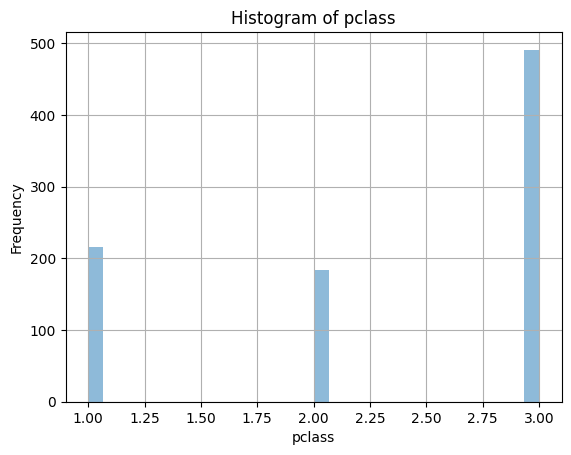

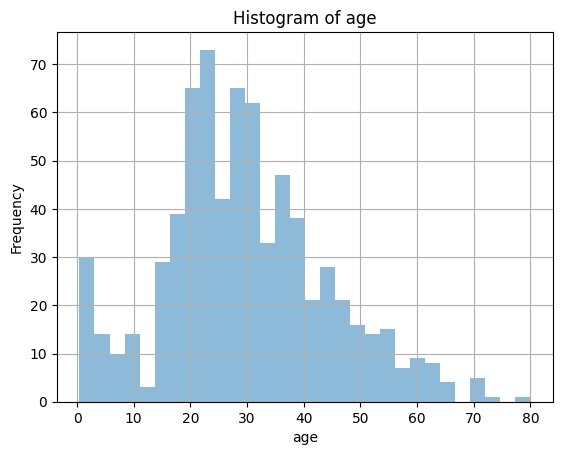

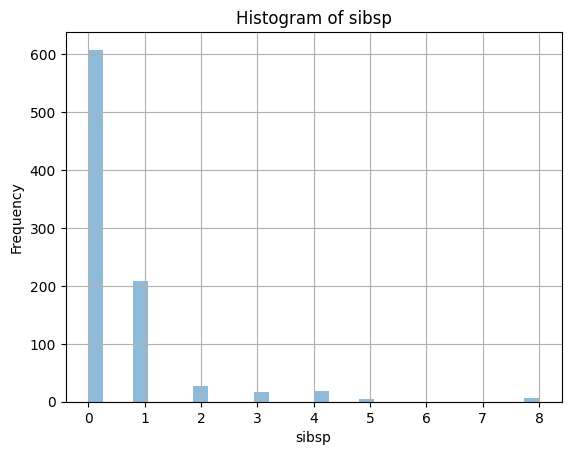

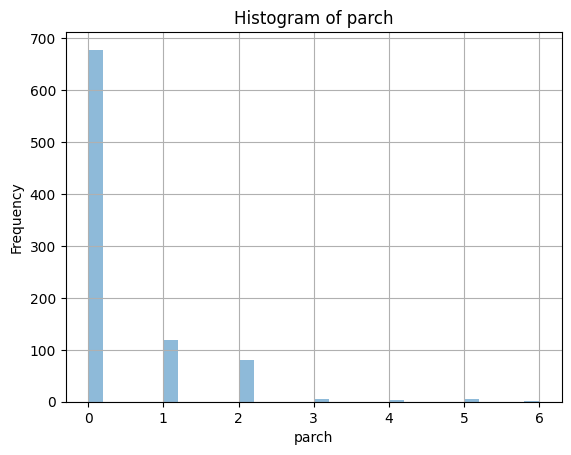

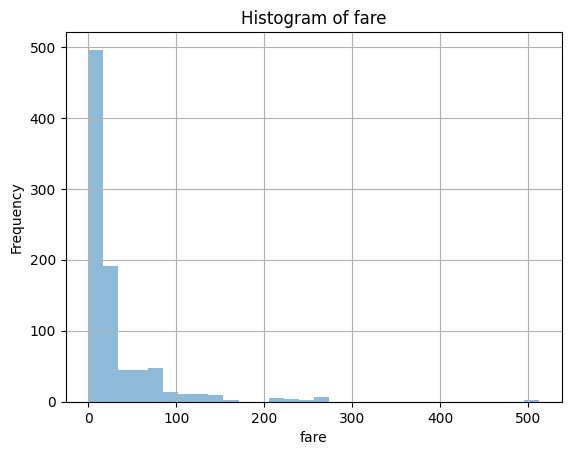


=== Iris Automated EDA ===
=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

=== Missing Values ===
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

=== Descriptive Statistics ===


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN



=== Outliers Detection (IQR) ===
sepal_length: 0 outliers
sepal_width: 4 outliers
petal_length: 0 outliers
petal_width: 0 outliers

=== Correlation Matrix ===


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000



=== Histograms ===


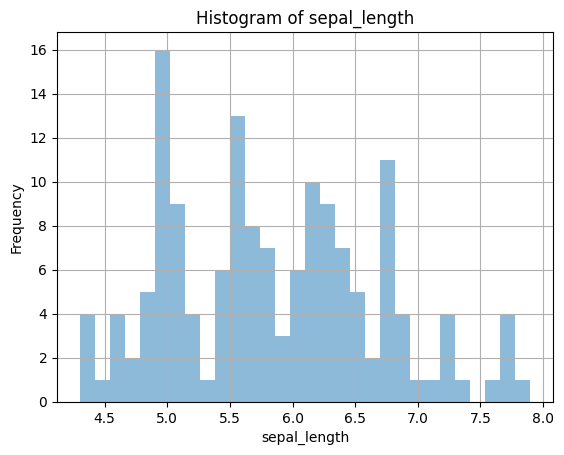

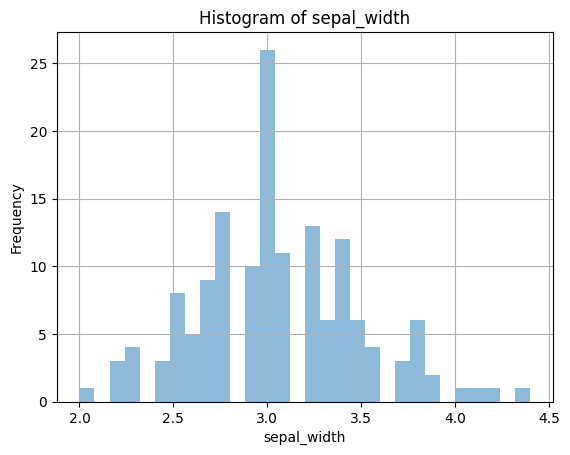

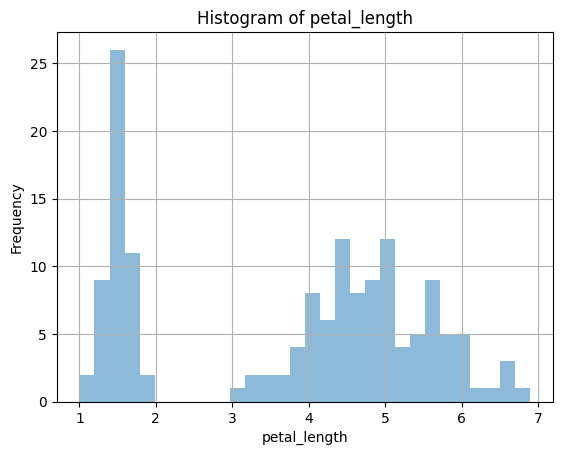

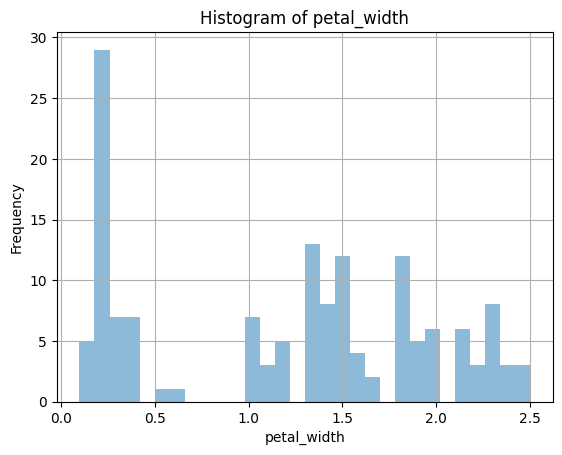

In [4]:
# --- 3. Automated EDA ---
print("\n=== Titanic Automated EDA ===")
automated_eda(titanic_df)

print("\n=== Iris Automated EDA ===")
automated_eda(iris_df)


--- Titanic Advanced Visualizations ---

Boxplot for survived:


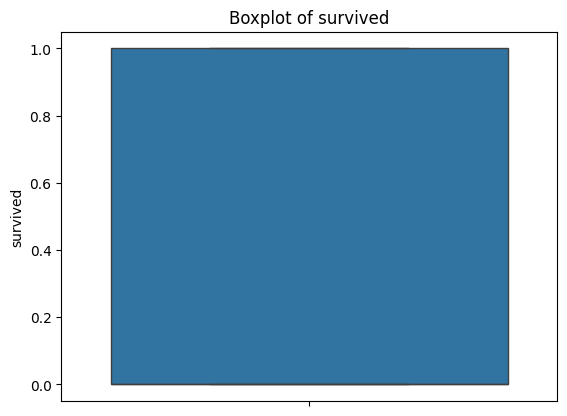


Violinplot for survived:


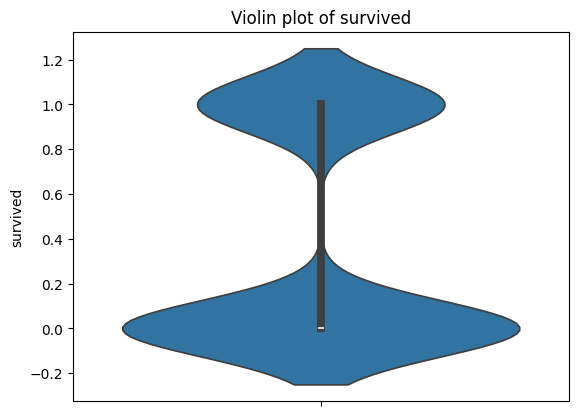


Boxplot for pclass:


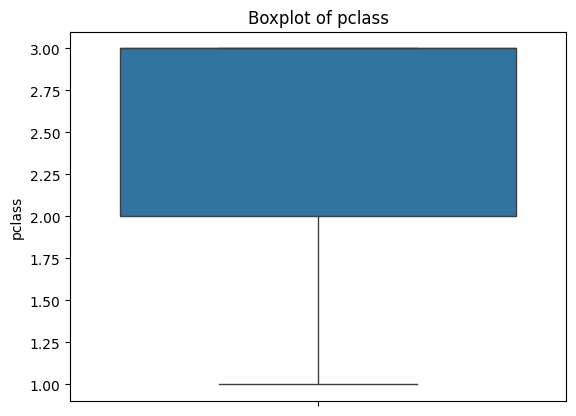


Violinplot for pclass:


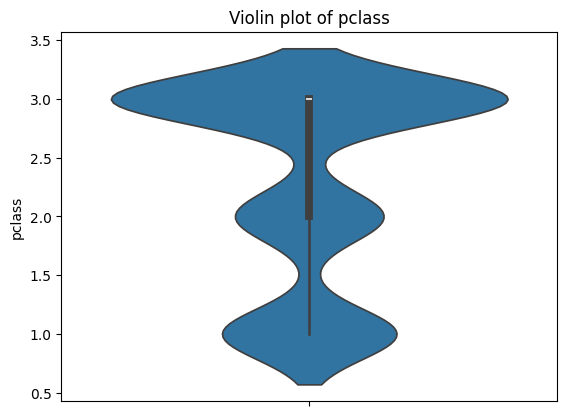


Boxplot for age:


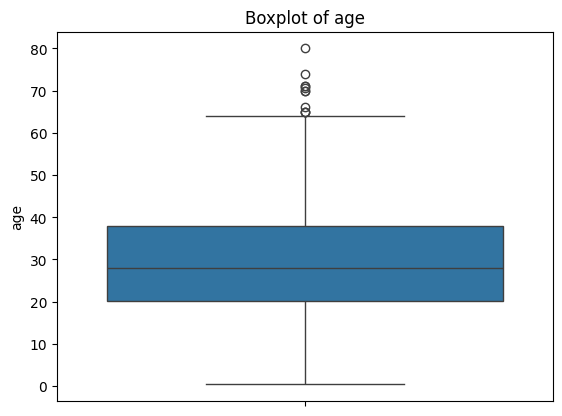


Violinplot for age:


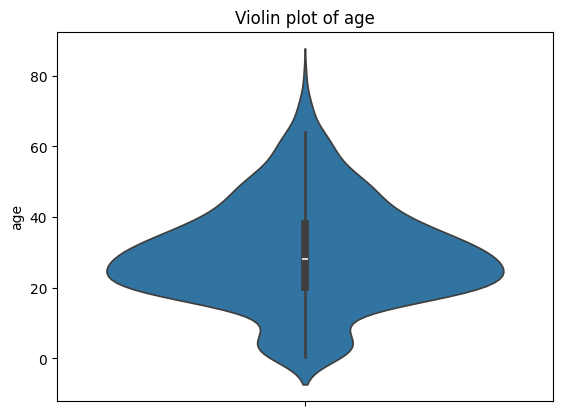


Boxplot for sibsp:


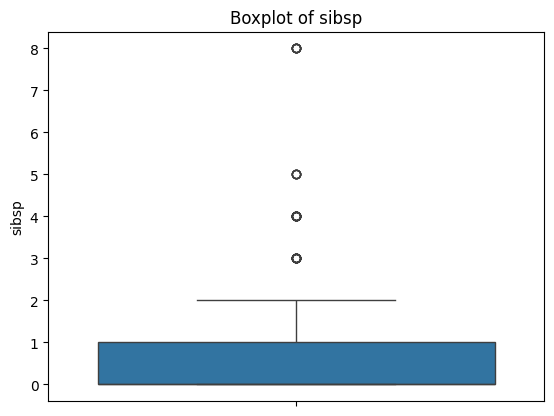


Violinplot for sibsp:


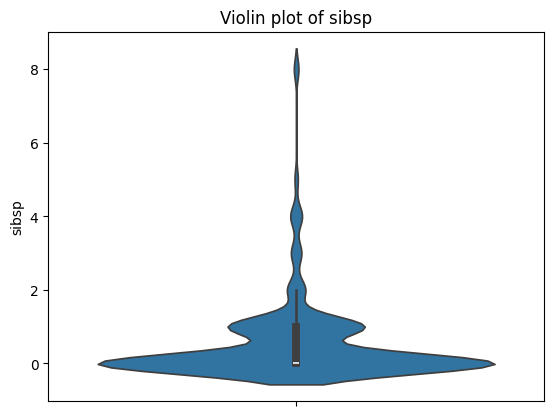


Boxplot for parch:


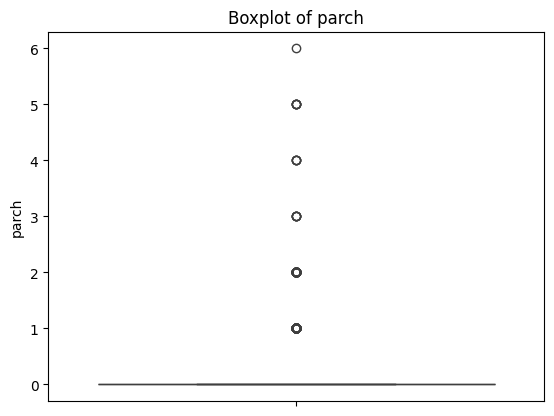


Violinplot for parch:


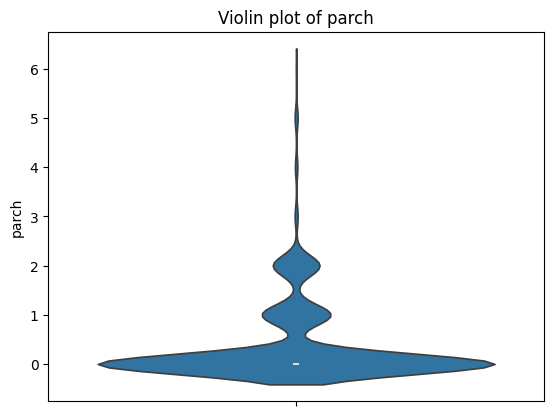


Boxplot for fare:


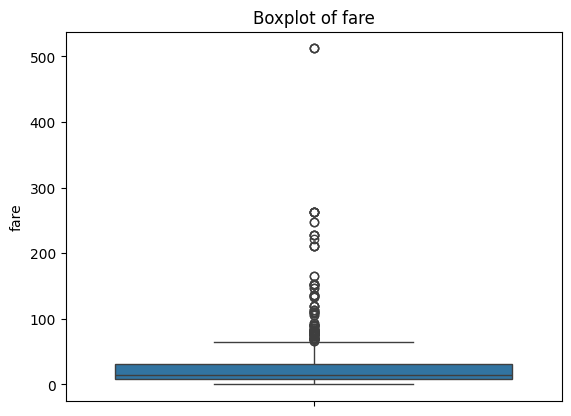


Violinplot for fare:


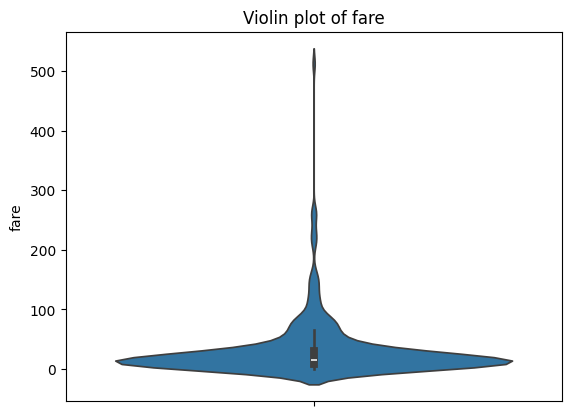


Pairplot for Titanic numeric columns:


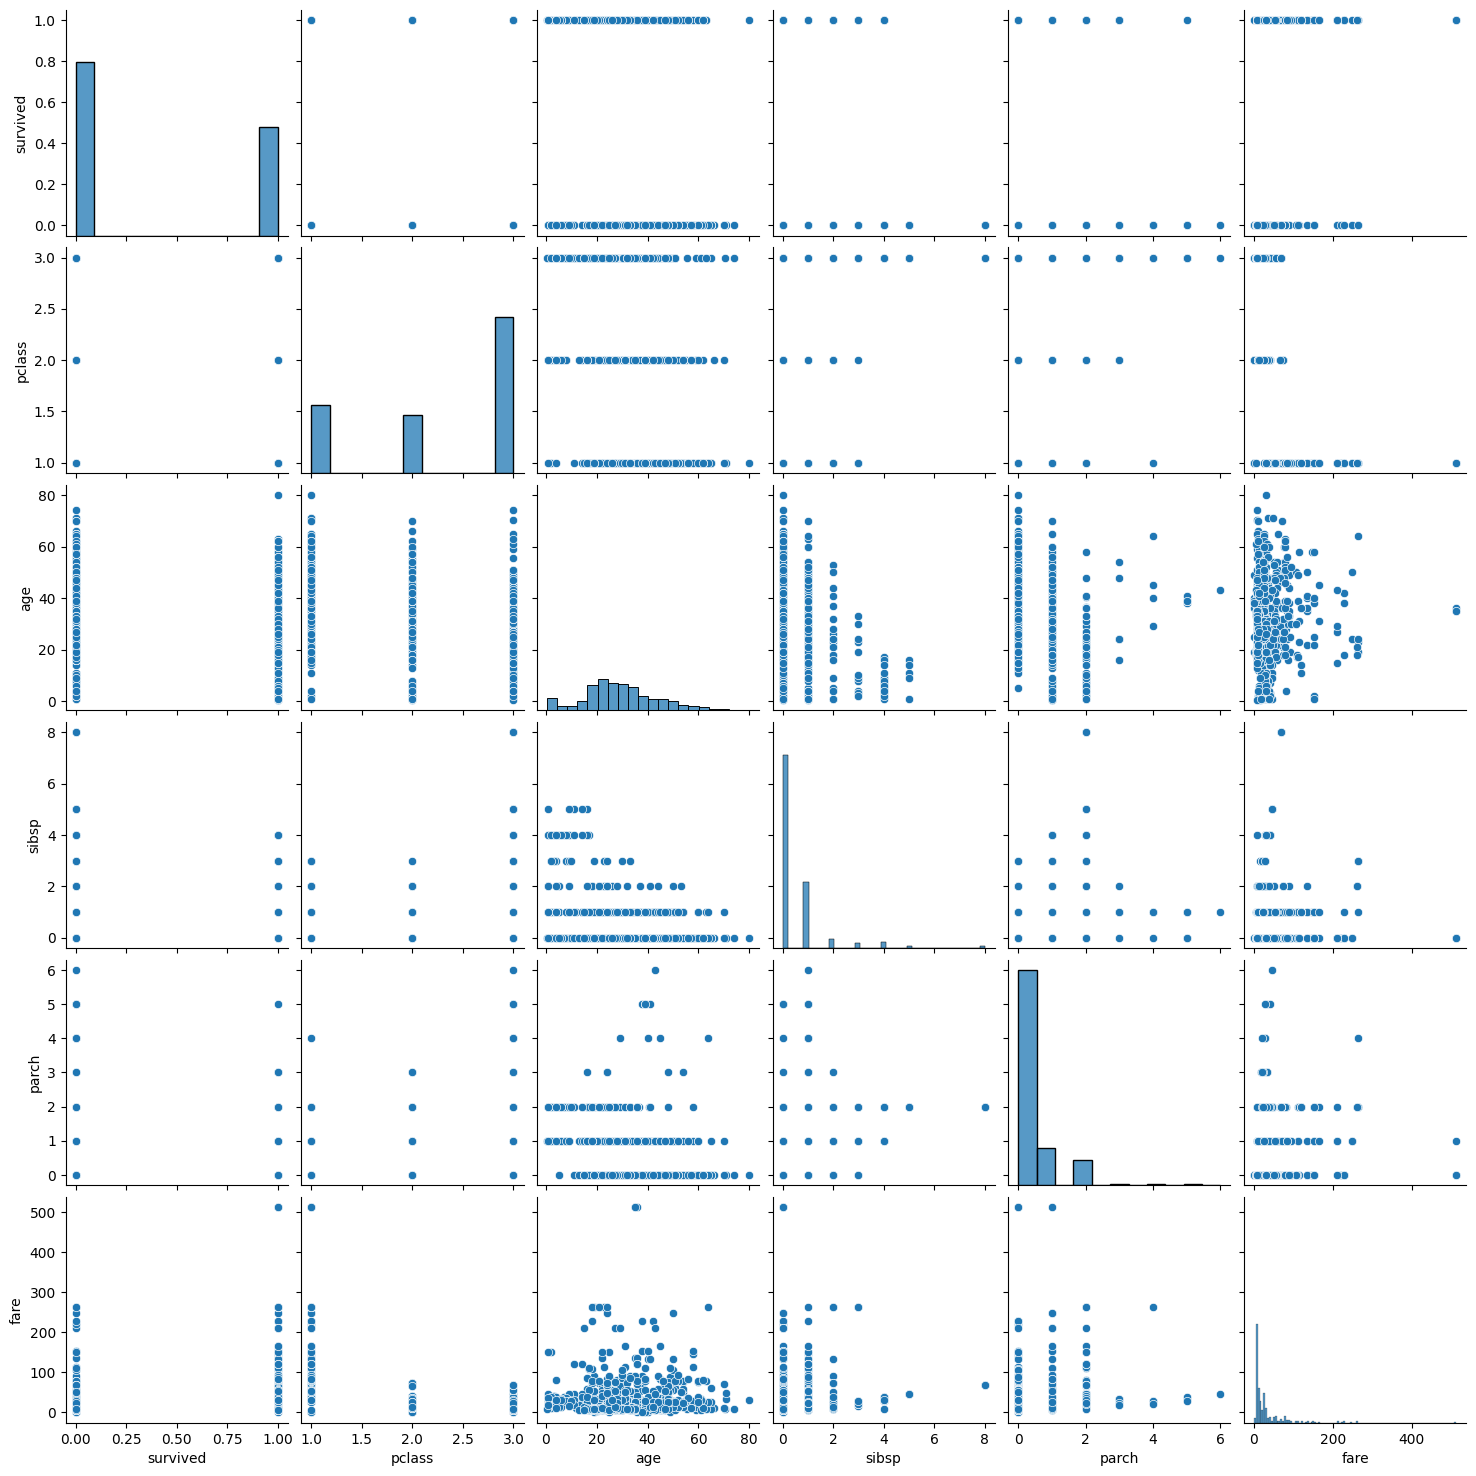


--- Iris Advanced Visualizations ---

Boxplot for sepal_length:


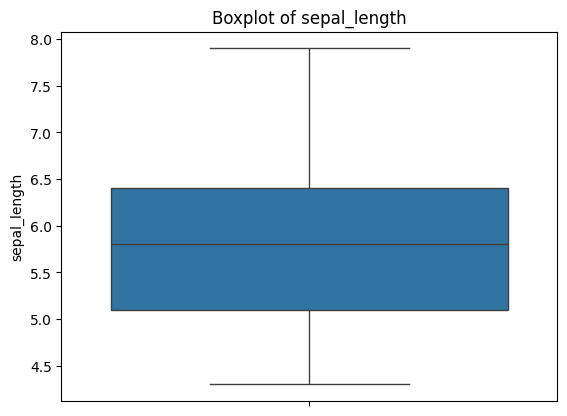


Violinplot for sepal_length:


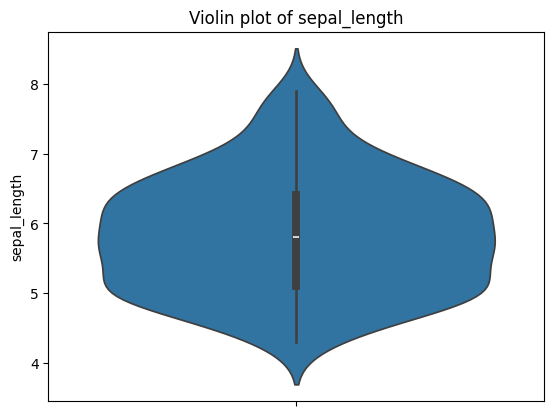


Boxplot for sepal_width:


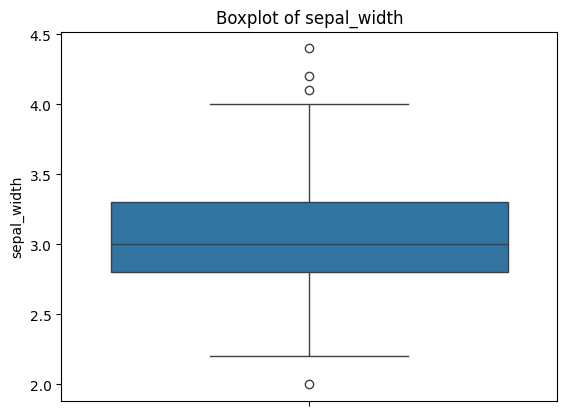


Violinplot for sepal_width:


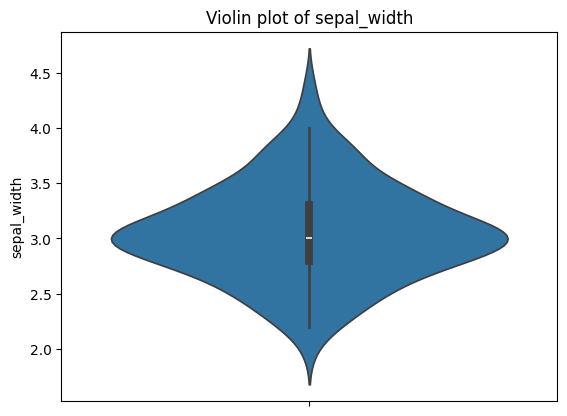


Boxplot for petal_length:


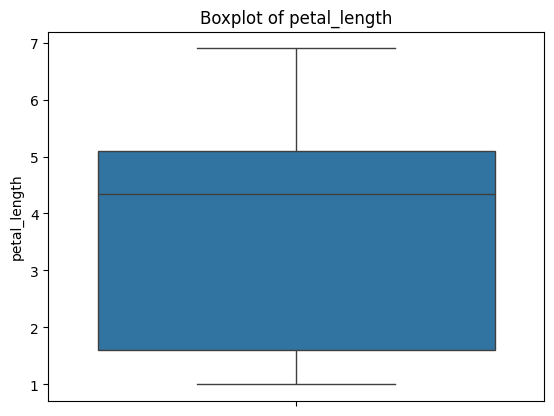


Violinplot for petal_length:


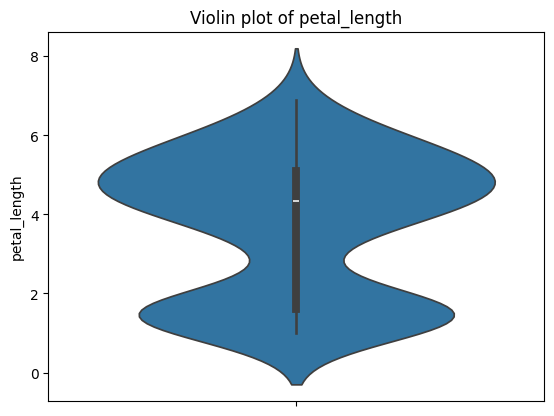


Boxplot for petal_width:


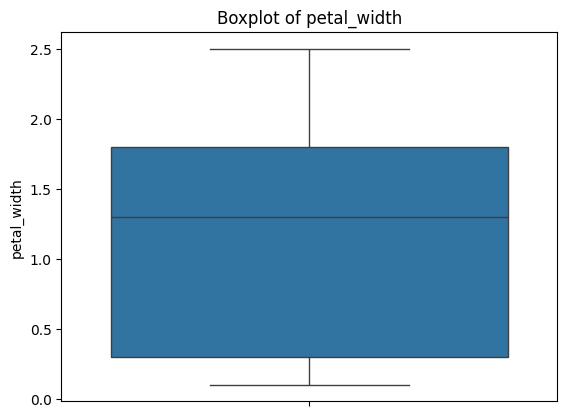


Violinplot for petal_width:


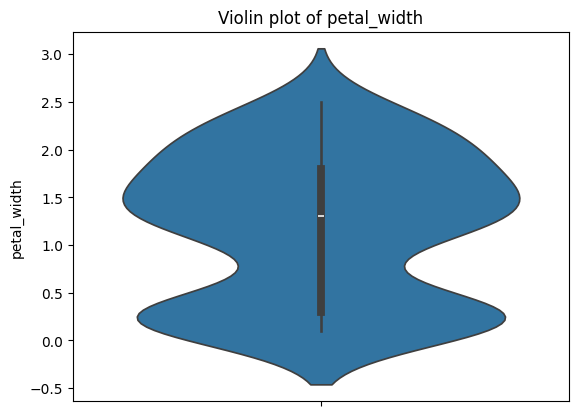


Pairplot for Iris numeric columns:


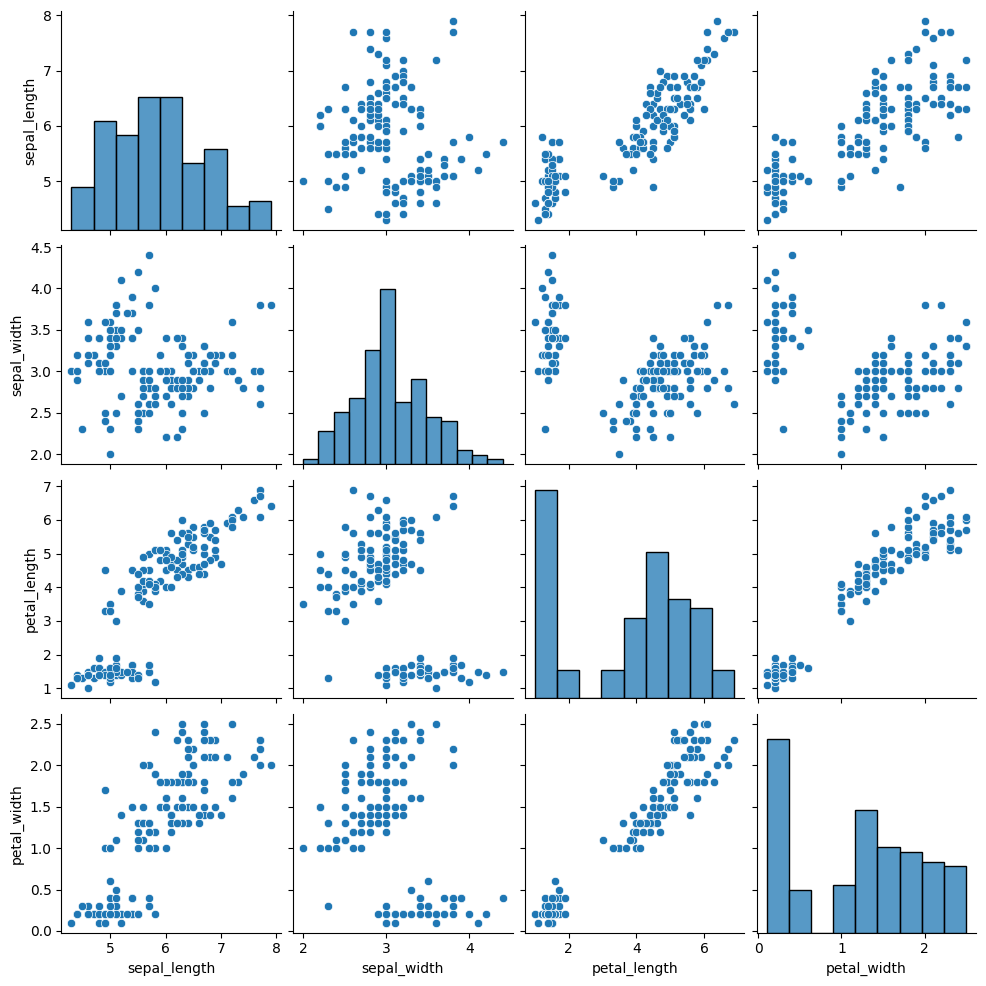

In [5]:
# --- 4. Advanced Visualizations ---
print("\n--- Titanic Advanced Visualizations ---")
numeric_cols_titanic = titanic_df.select_dtypes(include='number').columns.tolist()
if numeric_cols_titanic:
    for col in numeric_cols_titanic:
        print(f"\nBoxplot for {col}:")
        boxplot(titanic_df, col)
        print(f"\nViolinplot for {col}:")
        violinplot(titanic_df, col)
    print("\nPairplot for Titanic numeric columns:")
    pairplot(titanic_df[numeric_cols_titanic])

print("\n--- Iris Advanced Visualizations ---")
numeric_cols_iris = iris_df.select_dtypes(include='number').columns.tolist()
if numeric_cols_iris:
    for col in numeric_cols_iris:
        print(f"\nBoxplot for {col}:")
        boxplot(iris_df, col)
        print(f"\nViolinplot for {col}:")
        violinplot(iris_df, col)
    print("\nPairplot for Iris numeric columns:")
    pairplot(iris_df[numeric_cols_iris])

In [6]:
# --- 5. ML Feature Suggestions ---
print("\n=== Titanic ML Feature Summary ===")
ml_feature_summary(titanic_df)

print("\n=== Iris ML Feature Summary ===")
ml_feature_summary(iris_df)


=== Titanic ML Feature Summary ===
=== Columns with Missing Values ===


age            177
embarked         2
deck           688
embark_town      2
dtype: int64


=== Categorical Columns ===
['sex', 'embarked', 'who', 'embark_town', 'alive']

=== Numeric Columns ===
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

=== Suggested Actions ===
- sex: Consider encoding (One-Hot / LabelEncoder)
- embarked: Consider encoding (One-Hot / LabelEncoder)
- who: Consider encoding (One-Hot / LabelEncoder)
- embark_town: Consider encoding (One-Hot / LabelEncoder)
- alive: Consider encoding (One-Hot / LabelEncoder)
- survived: Consider scaling (StandardScaler / MinMaxScaler)
- pclass: Consider scaling (StandardScaler / MinMaxScaler)
- age: Consider scaling (StandardScaler / MinMaxScaler)
- sibsp: Consider scaling (StandardScaler / MinMaxScaler)
- parch: Consider scaling (StandardScaler / MinMaxScaler)
- fare: Consider scaling (StandardScaler / MinMaxScaler)

Columns with >30% missing values (consider dropping or imputing):
['deck']

=== Iris ML Feature Summary ===
=== Columns with Missing Values ===


Series([], dtype: int64)


=== Categorical Columns ===
['species']

=== Numeric Columns ===
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

=== Suggested Actions ===
- species: Consider encoding (One-Hot / LabelEncoder)
- sepal_length: Consider scaling (StandardScaler / MinMaxScaler)
- sepal_width: Consider scaling (StandardScaler / MinMaxScaler)
- petal_length: Consider scaling (StandardScaler / MinMaxScaler)
- petal_width: Consider scaling (StandardScaler / MinMaxScaler)

No columns with >30% missing values.


In [9]:
# --- 6. Interactive EDA Widgets ---
print("\n=== Interactive EDA for Titanic Dataset ===")
interactive_eda(titanic_df)

print("\n=== Interactive EDA for Iris Dataset ===")
interactive_eda(iris_df)


=== Interactive EDA for Titanic Dataset ===


Dropdown(description='Numeric Column:', options=('survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'), value…


=== Interactive EDA for Iris Dataset ===


Dropdown(description='Numeric Column:', options=('sepal_length', 'sepal_width', 'petal_length', 'petal_width')…